In [2]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [3]:
import glob
from ercollect import molecule as mol
from ercollect.molecule import molecule
from ercollect import rxn_syst
from ercollect.rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [5]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

### collect a random subset of X reactions

In [13]:
no_ = 10
rs_to_test = []
no_rxns_in_total = len(glob.glob(rs_dir+"*sRS*.gpkl"))
idx = np.random.randint(no_rxns_in_total, size=no_) # + 10000

In [14]:
generator = rxn_syst.yield_rxn_syst(output_dir=rs_dir)

In [15]:
smiles_list = []
n_list = []
for i, rs in enumerate(generator):
    if i not in idx:
        continue
    print('index:', i)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
#     try:
#         print('reversible?', rs.reversible)
#     except AttributeError:
#         print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
        try:
            print(rs.skip_reason)
        except AttributeError:
            pass
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
                print('CHEBI ID:', m.chebiID)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
                print('RDKIT logP:', m.logP)
                print('RDKIT Synthetic accessibility:', m.Synth_score)   
                print('size:', m.mid_diam, 'angstrom')
        print('----------------------------------------------')
        print('change in complexity:', rs.delta_comp)
        print('change in synthetic accessibility:', rs.delta_sa)
        # check sequence properties
        print('----------------------------------------------')
        try:
            if rs.sequence is not None:
                print(rs.sequence)
                try:
                    print('uniprotID:', rs.UniprotID)
                except AttributeError:
                    pass
                print('add other sequence IDs for other DBs')
                print('sequence length:', len(rs.sequence))
                print('pI:', rs.pI)
                print('GRAVY:', rs.GRAVY)
                print('A index:', rs.A_index)
                print('I index:', rs.I_index)
                print('TM index:', rs.TM_index)
        except AttributeError:
            pass
    input('done?')
    clear_output()

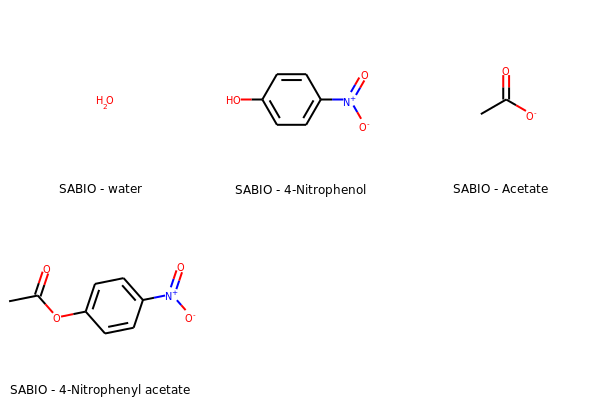

In [21]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)


## Visualize a specific reaction system
- includes search functions

In [4]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw

In [10]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [11]:
# get a list of RS with max_comp_size < XX and sequence != None
XX = 6.5
for rs in yield_rxn_syst(output_dir=directory):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size < XX:
        try:
            if rs.sequence is not None:
                print(rs.pkl, rs.TM_index, rs.A_index)
        except AttributeError:
            pass

AttributeError: 'reaction' object has no attribute 'max_comp_size'

In [12]:
pkl_name = 'sRS-1_14_13_XX-ATLAS-rat019476.gpkl'

In [13]:
rs = get_RS(directory+pkl_name, output_dir=directory, verbose=True)

loading: sRS-1_14_13_XX-ATLAS-rat019476.gpkl


In [14]:
rs.__dict__

{'DB': 'ATLAS',
 'DB_ID': 'rat019476',
 'EC': '1.14.13.-',
 'UniprotID': None,
 'all_fit': None,
 'components': [<ercollect.molecule.molecule at 0x7efd3c9107b8>,
 'pkl': 'sRS-1_14_13_XX-ATLAS-rat019476.gpkl',
 'req_mod': None,
 'seed_MOF': None,
 'skip_reason': None,
 'skip_rxn': False}

C00007 None 0.067 reactant 3.373829457410931 0 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
cis-4-carboxymethylenebut-2-en-4-olide None 0.06790000000000002 product 3.355269366675514 236 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_1895.gpkl
NADPH None -2.5693999999999964 reactant 5.474954998539056 1410 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_261.gpkl
hydron None 0.1125 reactant 7.745184615384615 0 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_17.gpkl
Protoanemonin None 0.6131 product 3.8960154893580867 144 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_1124.gpkl
C00006 None -2.898899999999996 product 5.33232270259073 1300 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_525.gpkl
water None -0.8247 product 5.868476923076923 0 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_14.gpkl
hydrogencarbonate None -1.1122999999999998 reactant 3.110319200314134 24.8 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_1432.gpkl


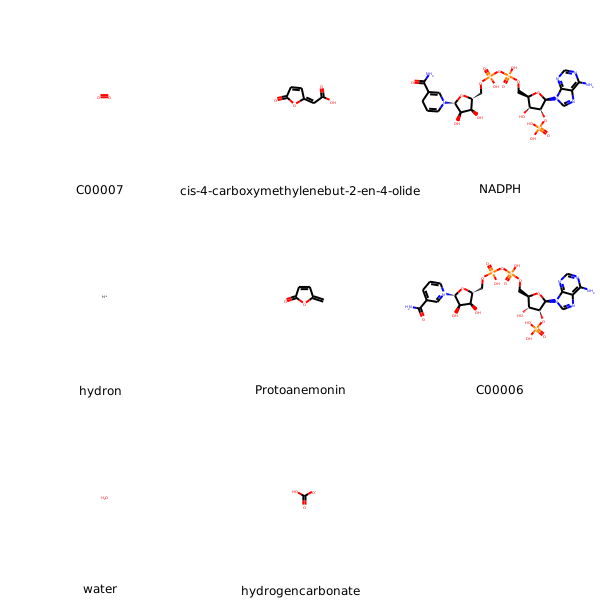

In [16]:
smiles_list = []
n_list = []
for m in rs.components:
    print(m.name, m.mid_diam, m.logP, m.role, m.Synth_score, m.complexity, m.pkl)
    n_list.append(m.name)
    smiles_list.append(m.SMILES)
    MOL = Chem.MolFromSmiles(m.SMILES)
#     Draw.MolToFile(MOL, fileName=m.name+'.svg')
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

## Analyse all RS for a certain skip_reaction reason

In [8]:
import os

In [9]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [10]:
count = 0
count_total = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    count_total += 1
    if rs.skip_rxn is True:
        if rs.skip_reason == 'one component has no SMILES':
            count += 1
            print(rs.pkl)
            os.system('rm '+rs_dir+rs.pkl)

sRS-1_10_3_10-KEGG-R11335.gpkl
sRS-1_10_3_11-KEGG-R09504.gpkl
sRS-1_10_3_12-KEGG-R09492.gpkl
sRS-1_10_3_14-KEGG-R11325.gpkl
sRS-1_10_3_14-KEGG-R11885.gpkl
sRS-1_10_3_14-KEGG-R11886.gpkl
sRS-1_10_3_2-KEGG-R00083.gpkl
sRS-1_11_1_16-KEGG-R07612.gpkl
sRS-1_11_1_21-KEGG-R02596.gpkl
sRS-1_11_1_21-KEGG-R03532.gpkl
sRS-1_11_1_21-KEGG-R03919.gpkl
sRS-1_11_1_21-KEGG-R07443.gpkl
sRS-1_11_1_7-KEGG-R02596.gpkl
sRS-1_11_1_7-KEGG-R03532.gpkl
sRS-1_11_1_7-KEGG-R03919.gpkl
sRS-1_11_1_7-KEGG-R07443.gpkl
sRS-1_11_1_XX-ATLAS-rat010350.gpkl
sRS-1_11_1_XX-ATLAS-rat010390.gpkl
sRS-1_11_1_XX-ATLAS-rat010391.gpkl
sRS-1_11_1_XX-ATLAS-rat010392.gpkl
sRS-1_11_1_XX-ATLAS-rat010393.gpkl
sRS-1_11_1_XX-ATLAS-rat010585.gpkl
sRS-1_11_1_XX-ATLAS-rat010586.gpkl
sRS-1_11_1_XX-ATLAS-rat010605.gpkl
sRS-1_11_1_XX-ATLAS-rat010737.gpkl
sRS-1_11_1_XX-ATLAS-rat010738.gpkl
sRS-1_11_1_XX-ATLAS-rat010739.gpkl
sRS-1_11_1_XX-ATLAS-rat010740.gpkl
sRS-1_11_1_XX-ATLAS-rat010782.gpkl
sRS-1_11_1_XX-ATLAS-rat010804.gpkl
sRS-1_11_1_XX-ATLAS

In [11]:
print(count, count_total, count/count_total * 100)

1749 49971 3.500030017410098
